In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv('/content/Wine_clust  (1).csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
X=data[['Alcohol','Malic_Acid']]
X.head()

,Alcohol,Malic_Acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


<function matplotlib.pyplot.show(close=None, block=None)>

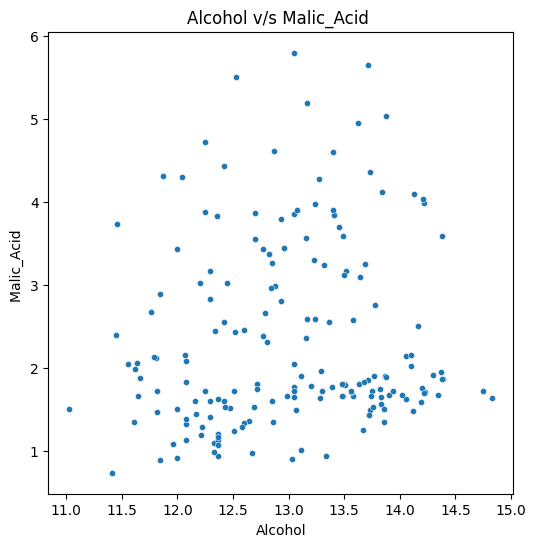

In [8]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Alcohol',y='Malic_Acid',data=X,s=20)
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid ')
plt.title('Alcohol v/s Malic_Acid ')
plt.show

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss =[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init = 'k-means++', max_iter = 300 , n_init= 10 , random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
wcss

[337.55275842696636,
 168.0837419169812,
 95.55394205616608,
 72.68914691708522,
 61.388816129096554,
 51.78785605389446,
 43.24916513123895,
 36.714654196014195,
 32.3271586904762,
 28.82328239650746]

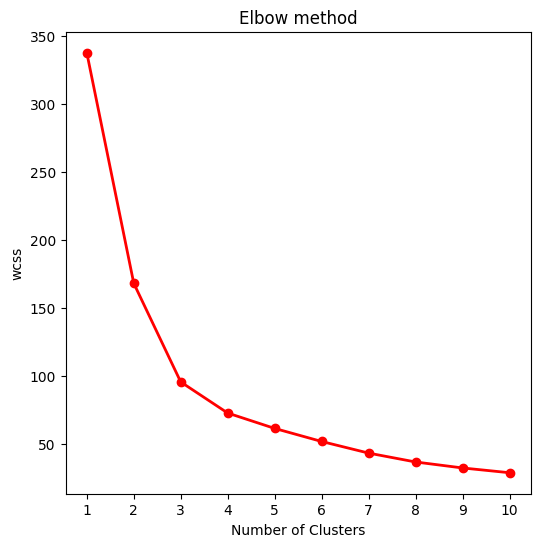

In [11]:
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='o')
plt.title("Elbow method")
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.xticks(np.arange(1,11,1))
plt.show()

In [12]:
kmeans=KMeans(n_clusters=15, init = 'k-means++', max_iter = 300 , n_init= 10 , random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)
cluster_labels

array([ 4,  0,  9,  4,  9,  4,  4,  4,  4, 13,  4, 13, 13,  4,  4, 13,  4,
       13,  4,  3, 13,  7, 13,  0, 13,  0,  0,  0, 13, 13, 13, 13, 13, 13,
       13, 13,  0,  0,  0, 10, 13,  7, 13,  7,  0, 10, 10, 13,  4, 13,  0,
       13, 13, 13, 13, 13,  4,  0, 13,  6,  6,  6, 13,  6,  2,  6,  6,  6,
        6,  2,  2, 13, 13,  0, 14, 11,  6,  5,  6,  7, 14,  0,  2,  7, 14,
        6,  2, 11, 11,  2,  2,  2,  6,  5, 11,  2, 11,  2,  6,  5, 11,  6,
        9, 11,  2,  9,  2,  0,  2, 14,  8,  9,  5, 14,  2, 14,  2,  2,  7,
        5, 11, 11,  8, 12,  8, 11,  2, 11,  2,  8,  6,  9,  9,  7,  6,  9,
        8, 12,  7,  9,  9,  9,  3,  1,  8,  7,  1,  1,  3,  7,  3,  9,  0,
        3,  6, 12, 10,  5,  4, 13,  8,  3,  7,  7,  3,  1,  7,  7,  3,  1,
        5,  9,  4, 12,  7,  1,  9, 10], dtype=int32)